## 2. Datenvorverarbeitung mit Pandas: Food Nutrient Database

Diese Aufgabe befasst sich mit einer deutlich umfangreicheren Datenbank desU.S. Depart-ment of Agriculture, aufbereitet im Format JSON von A. Williams, zum Thema Nährstoffge-halt von Nahrungsmitteln. Sie enthält 6636 Einträge für Nahrungsmittel, alle in Form vonJSON-Records.

Ziel der Analyse in dieser Übung ist es, eine explorative Analyse des Gehalts des Spurenele-mentes Zink in den verschiedenen Nahrungsmitteln zu durchzuführen. Notwendig dafür sindetwas aufwändigere, aber für die Datenanlyse typische Manipulationen mit Pandas sowie der2
Einsatz zusätzlicher Python-Standardbibliotheken zum Download und der Verarbeitung vonZip- und JSON-Dateien.

In [26]:
%reload_ext version_information

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
import json

%version_information numpy, pandas, matplotlib, json

Software versions
Python 3.7.3 32bit [MSC v.1916 32 bit (Intel)]
IPython 7.8.0
OS Windows 10 10.0.18362 SP0
numpy 1.17.3
pandas 0.25.2
matplotlib 3.1.1
json 2.0.9
Sat Oct 19 17:45:28 2019 Mitteleuropäische Sommerzeit

* Laden Sie die Datenbank als zip-File aus Moodle herunter und lesen Sie dieses File direktin ein neues Notebook ein.

In [27]:
with ZipFile('foods-2011-10-03.json.zip', 'r') as zip:
    filename = str(zip.namelist()[0])
    file = zip.open(filename)
    jsonfile = json.load(file)

* Kopieren Sie zunächst die Felder’description’,’group’,’id’,’manufacturer’ineinen eigenen DataFrameinfo, sowie alle Nährstofflisten in ein Array von DataFrames,wobei Sie an jeden DataFrame die entsprechende ID des Nahrungsmittels als eigeneSpalte anhängen.

In [28]:
# create DataFrame from json 
data = pd.DataFrame(jsonfile)
# select data of interest
info = data[['description', 'group', 'id', 'manufacturer']]
# write nutriens as DataFrame list
nutrients = []

for d in data.index:
    tmp = pd.DataFrame(data['nutrients'][d])
    tmp['id'] = data['id'][d]
    nutrients.append(tmp)

In [29]:
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


* Dieses Array wird mithilfe der Funktionpandas.concat()zu einem großen DataFramenutrients(389355 Einträge) vereinigt.

In [30]:
nutrients = pd.concat(nutrients)
print(len(nutrients))
nutrients.head()

389355


,value,units,description,group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


* Entfernen Sie alle Duplikate aus diesem DataFrame.

In [31]:
nutrients.drop_duplicates()

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
45,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
46,0.000,mg,Cholesterol,Other,43546
47,0.072,g,"Fatty acids, total saturated",Other,43546
48,0.028,g,"Fatty acids, total monounsaturated",Other,43546


* Bevor beide DataFrames vereinigt werden können, gibt es noch ein Problem: beideenthalten Felder mit dem Namen’description’und’group’(s.o.). Benennen Siediese daher mithilfe vonDataFrame.rename()in eindeutige Namen um.

In [32]:
nutrients = nutrients.rename(columns={'description':'nutrients_description', 'group':'nutrients_group'})
nutrients.head()

,value,units,nutrients_description,nutrients_group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


* Vereinigen Sie beide DataFrames mitpandas.merge(nutrients, info, on=’id’,how=’outer’)anhand der Nahrungsmittel-ID.

In [33]:
df = pd.merge(nutrients, info, on='id', how='outer')
df.head()

    value units        nutrients_description nutrients_group    id  \
0   25.18     g                      Protein     Composition  1008   
1   29.20     g            Total lipid (fat)     Composition  1008   
2    3.06     g  Carbohydrate, by difference     Composition  1008   
3    3.28     g                          Ash           Other  1008   
4  376.00  kcal                       Energy          Energy  1008   

       description                   group manufacturer  
0  Cheese, caraway  Dairy and Egg Products               
1  Cheese, caraway  Dairy and Egg Products               
2  Cheese, caraway  Dairy and Egg Products               
3  Cheese, caraway  Dairy and Egg Products               
4  Cheese, caraway  Dairy and Egg Products               


Nun sind die Daten bereit für die Untersuchung auf das Spurenelement Zink (Feldname:’Zinc, Zn’). Lesen Sie dazu alle Tabelleneinträge mithilfe einer geeigneten Indizierungin einen DataFrame aus, der nur Einträge zum Nährstoff Zink enthält. Daraus wählenSie wiederum die Spalte mit dem Zinkgehalt in mg (’value’) aus und stellen dafür einHistogramm und eine Liste deskriptiver Statistiken dar.

count    6354.000000
mean        2.218865
std         3.917773
min         0.000000
25%         0.360000
50%         0.990000
75%         2.990000
max        90.950000
Name: value, dtype: float64

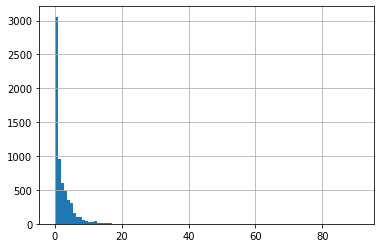

In [39]:
zink = df[df['nutrients_description'] == 'Zinc, Zn']
zink_value = zink['value']

zink_value.hist(bins=100)
zink_value.describe()

* Finden Sie in Ihrer Tabelle Edamer(’Cheese, edam’). Hat Edamer einen überdurchschnittlichen Zinkgehalt?

* Haben mehr als 75% aller Nahrungsmittel einen kleineren Zinkgehalt? 

In [41]:
zink[zink['description'] == 'Cheese, edam']['value'].describe()

count    3.00
mean     3.75
std      0.00
min      3.75
25%      3.75
50%      3.75
75%      3.75
max      3.75
Name: value, dtype: float64

Edamer enthält im Durchschnitt 3,75 mg Zink. Dies ist mehr als der Durchschnitt aller Lebensmittel.

Auch zeigt die Analyse, dass 75% aller Lebensmittel einen Zink Wert von < 2.99 mg haben.

* Welches Nahrungsmittel hat denmaximalen Zinkgehalt?

In [46]:
zink.max()['description']

'Yogurt, vanilla, low fat, 11 grams protein per 8 ounce'

'Yogurt, vanilla, low fat, 11 grams protein per 8 ounce' ist das Lebensmittel mit dem höchsten Zinkgehalt